In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 5.1 선형 SVM 벡터

### 서포트 벡터 머신(Support Vector Machine)
* 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델
* 라지 마진 분류(Large Margin Classification) : 두 데이터의 클래스를 분리할 수 있는 무수히 많은 직선들 중 두 데이터 클래스간의 간격(margin)이 최대로하는 MMH(Maximum Marginal Hyperplane, 최대 마진 초평면)을 찾아 분리하는 방법
* 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않는다. 도로 경계에 위치한 샘플에 의해 전적으로 결정된다. 이런 샘플을 서포트 벡터(Support Vector)라고 한다.
* SVM은 특성의 스케일에 민감하다.

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

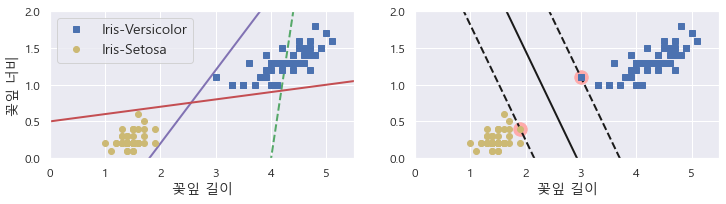

In [4]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_  # support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

(-2.0, 2.0, -2.0, 2.0)

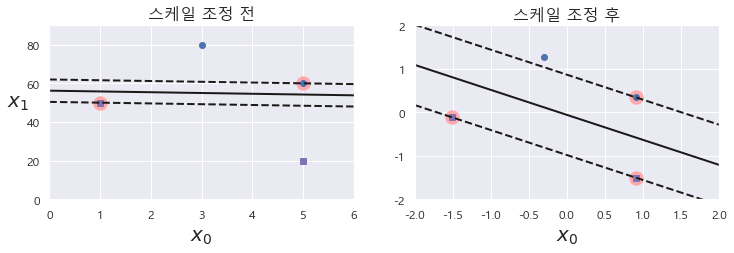

In [5]:
#특성 스케일에 민감하다는 그래프
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

## 5.1.1 소프트 마진 분류

* 하드 마진 분류(Hard Margin Classification) : 모든 샘플이 도로 바깥쪽에 올바르게 분류
 - 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며, 이상치에 민감하다.
 - 그래서 이런 문제를 피하려면 좀 더 유연한 모델이 필요
* 소프트 마진 분류(Soft Margin Classification) : 마진의 폭을 가능한 한 넓게 유지하는 것과 마진 오류(Margin Violation) 사이에 적절한 균형을 잡는 모델
 - 사이킷 런의 SVM모델은 여러 하이퍼파라미터를 지정할 수 있는데, C는 이런 하이퍼 파라미터중 하나
 - C를 낮게 설정하면 오류를 허용하는 정도가 커지고, 마진 또한 커진다.
 - C를 높게 설정하면 오류를 허용하는 정도가 작아지며, 마진 또한 작아진다.

In [6]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal lenght, petal width
y = (iris['target'] == 2).astype(np.float64)  # Iris - Virginca면 1 아니면 0

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('liear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('liear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
# C=1 / C=100 비교해보기
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

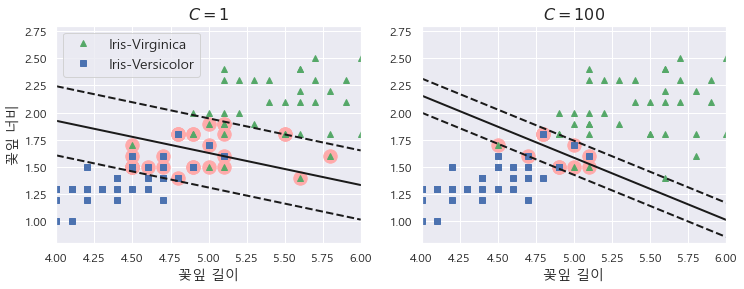

In [9]:
#시각화
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8]);

# 5.2 비선형 SVM 분류

* 비선형 데이터셋을 다루는 방법은 다항 특성과 같은 특성을 추가하는 것
* 예제, $x_1$특성에 $x_2$ = $($x_1$)^2$을 추가하여 2차원 데이터셋으로 만들어 선형분리

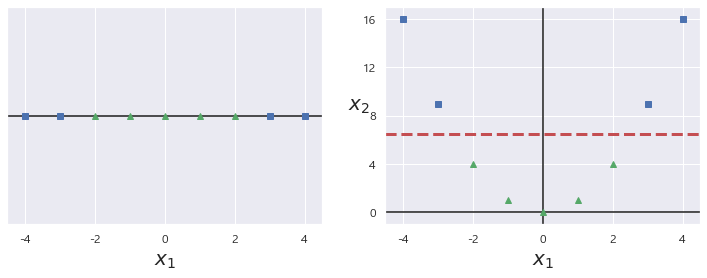

In [10]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

In [11]:
#사이킷 런에서는 PloynomialFeatures, StanardScaler, LinearSVC를 연결하여 Pipeline을 만든다.

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#moons 데이터 셋
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

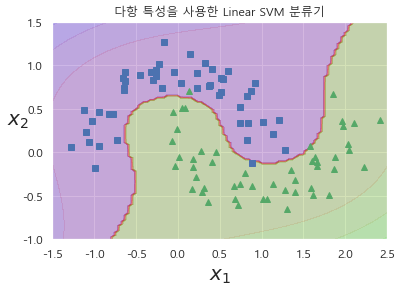

In [13]:
#시각화
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('다항 특성을 사용한 Linear SVM 분류기')
plt.show()

## 5.2.1 다항식 커널

* 다항식 특성을 추가하는 것은 간단하지만 낮은 찾수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고, 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만든다.
* SVM에서 이를 해결하기 위해 커널 트릭(Kernel Trick)을 사용한다.

In [14]:
#사이킷 런에서 SVC클래스에서 커널을 사용할 수 있다.
# 3차 다항식 커널
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=0.1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=0.1, kernel='poly'))])

In [15]:
#10차 다항식 커널
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, kernel='poly'))])

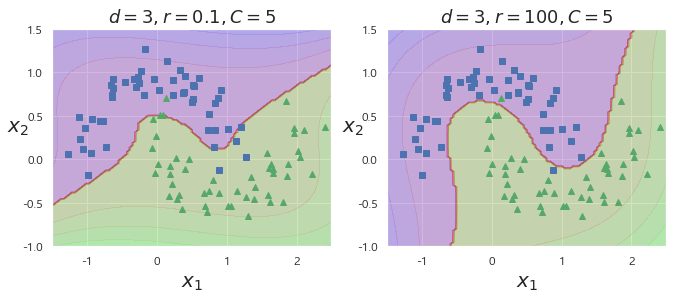

In [16]:
#시각화
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=0.1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.show()

## 5.2.2 유사도 특성
* 유사도 함수(Similarity Function) : 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 비선형 특성을 다루는 기법
* 예를 들어, 아래의 그래프와 같이 $x_2 = -2$와 $x_3 = 1$을 랜드마크라고 하고, $\gamma = 0.3$인 가우시안 RBF(Radial Basis Function, 방사 기저 함수)를 유사도 함수라고 정의

$$
\phi_{\gamma} \left( \mathbf{x}, \ell \right) = \text{exp} \left( -\gamma \left\| \mathbf{x} - \ell \right\|^{2} \right)
$$
$\ell$ : 랜드마크 지점

$\gamma$ : $\gamma$ >0 이며, 값이 작을 수록 넓은 종 모양(bell shape)이 됨

* 예를 들어, $x_1 = -1$일 경우

  첫 번째 랜드마크인 $x_1 = -2$에서 $\| -1 - (-2) \| = 1$
  두 번째 랜드마크인 $x_2 = 1$에서 $2$
  만큼 떨어져 있다.

  따라서, $x_1$의 새로운 특성은 $x_2 = \text{exp}(-0.3 \times 1^2) \approx 0.74$ 와     $x_3 = \text{exp}(-0.3 \times 2^2) \approx 0.30$이다.

  이러한, 유사도 특성 추가를 통해 아래의 오른쪽 그래프와 같이 선형분리가 가능하다.

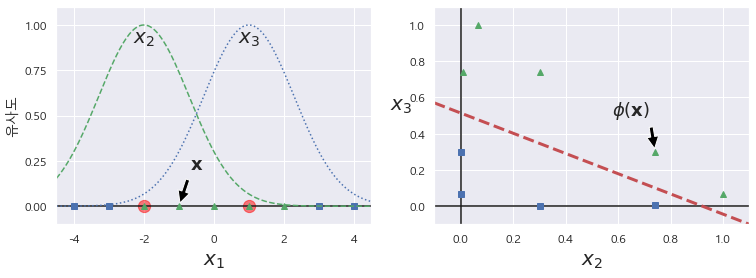

In [17]:
#가우시안 RBF를 사용한 유사도 특성
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

* 랜드마크 선택하는 방법 : 데이터 셋 위에 있는 모든 샘플 위치에 랜드마크 설정
 - 차원이 매우 커지고 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다.
 - 단점은 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다.

## 5.2.3 가우시안 RBF 커널

* 5.2.2처럼 유사도 특성을 추가하는 방법도 유용하나 특성을 추가하기 위해서는 계산 비용이 많이 드는 문제가 있다.
* 이를 가우시나 RBF Kernel을 이용하면 위와 같이 특성들을 계산하지 않고 비슷한 결과를 얻을 수 있다.

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \text{exp} \left( -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^{2} \right)
$$

- $\gamma$ : regularization 역할을 함
 - $\gamma$가 커지면 종 모양이 좁아져 각 데이터의 영향 범위가 작아져, 결정 경계(Decision Boundary)가 불규칙하고 구부러진다.
 - $\gamma$가 작아지면 넓은 종 모양이 되며, 데이터의 영향이 넓어져 결정 경계가 부드러워 진다.


In [18]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

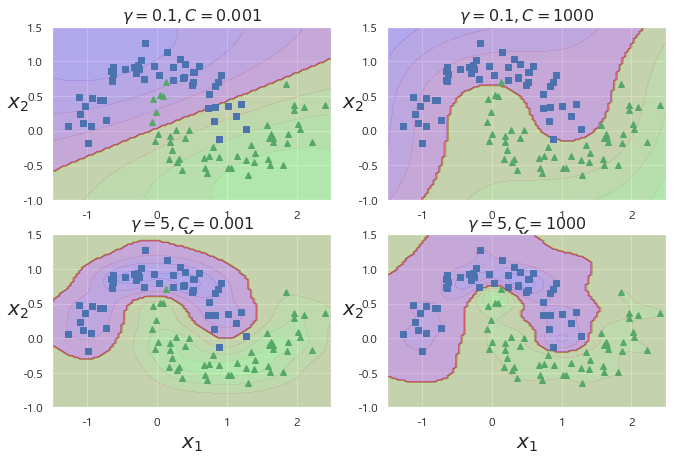

In [19]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

* 문자열 커널(String Kernel) : 텍스트 문서나 DNA서열을 분류할 때 사용
 - 문자열 서브시퀀스 커널(String Subsequence Kernel) / 레벤슈타인 거리(Levenshtein Distance)

Tip : 어떤 커널(kernel)을 사용할까?
 * 가장먼저 선형 커널(linear kernel)을 사용
   - 특히, Train set이 매우 크거나, 특성 수가 많을 경우에 해당되며, Scikit-Learn에서는 LinearSVC가 SVC(kernel='linear') 보다 훨씬 빠르다.

 * Train set이 크지 않다면, 가우시안 RBF 커널을 시도하는 것이 좋고, 대부분의 경우 이 커널이 잘 맞는다

# 5.3 SVM 회귀

* 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있다.
* 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM회귀는 제한된 마진 오류안에서 도로안에 가능한 한 많은 샘플이 들어가도록 학습한다.
* 마진 안쪽으로 Train set이 추가되어도 모델의 예측에는 영향을 주지 않기 때문에, SVM 회귀 모델을 $\epsilon$에 민감하지 않다($\epsilon$-insensitive)라고 한다.

In [20]:
#데이터 발생
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [21]:
#사이킷런의 LinearSVR을 사용해 선형 SVM 회귀를 적용
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [22]:
#엡실론 1.5 / 0.5 비교
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

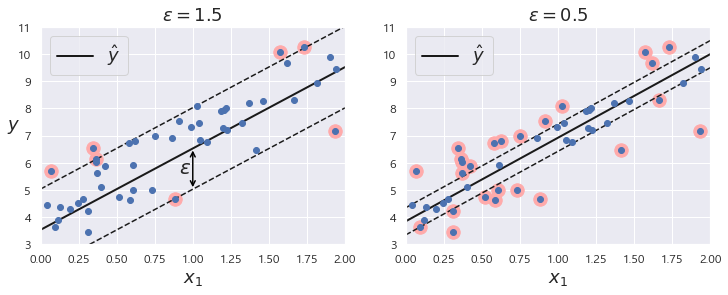

In [23]:
#시각화
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5, 'color': 'black'}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [24]:
#데이터 발생
np.random.seed(42)
m = 100
X = 2*np.random.rand(m, 1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [25]:
#2차 다항 커널을 사용한 SVM 회귀
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree = 2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [26]:
#규제 0.01 / 규제 100 비교
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=1, epsilon=0.05)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=1, degree=2, epsilon=0.05, kernel='poly')

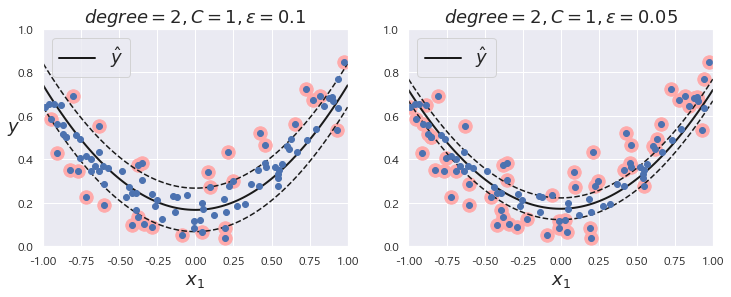

In [27]:
#시각화
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

# 5.4 SVM 이론

* 아래의 그림에서 ① 분류기는 Train set을 틀리게 분류한다. 이를 여러번 학습시켜 모델링하면 ②와 ③ 분류기와 같이 될것이다.

* Train set 측면에서 보면 ②와 ③ 분류기는 오류가 0이므로 같은 성능을 가진 분류기로 볼 수 있다. 하지만, 일반화(generalization) 측면에서 보면 ② 보다 ③이 더 낫다고 할 수 있다. 그 이유는 ③ 분류기가 두 개의 클래스에 대해 여백(margin) 크기 때문이다.

* 바로 여기서 이러한 여백, 즉 마진을 어떻게 공식화하고 이 마진을 최대화하는 결정 초평면(decision hyperplane)을 찾는 것이 바로 SVM의 발상이라 할 수 있다.

* 사진 - https://github.com/ExcelsiorCJH/Hands-On-ML/raw/eea2a029ec626854a972c24230de9053e1ece4af/Chap05-SVM/images/svm03.PNG

## 5.4.1 결정함수와 예측

* 선형 SVM분류기 모델은 단순히 결정 함수 $d (\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} + b = 0$ 를 계산해서 새로운 샘플x의 클래스를 예측

* $d(x)$는 전체 특성 공간을 두 영역으로 분할한다.
 - $d(x) = \mathbf{w}^{T} \mathbf{x} + b$ > 0 → $w_1$
 - $d(x) = \mathbf{w}^{T} \mathbf{x} + b$ < 0 → $w_2$ \
 
 
* 하나의 초평면을 표현하는 식은 여러가지가 있다. 
 - $c \times (\mathbf{w}^{T} \mathbf{x} + b) = 0$
 
 
* $\mathbf{w}$는 초평면의 법선벡터다.
 - $\mathbf{w}$은 초평면의 방향을 나타내고, $b$는 위치를 나타낸다.
 
 
* 임의의 점 $\mathbf{x}$에서 초평면까지 거리는 $h = \frac{|d(x)|}{\| \mathbf{w} \|}$ 이다.

#### * 선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나 제한적인 마진 오류를 가지면서 가능한 한 마진을 크게 하는 w와 b를 찾는것 

## 5.4.2 목적 함수

* SVM에서 풀고자 하는 문제는 아래의 그림에서 마진을 가장 크게하는 결정 초평면의 방향 즉 w를 찾는 것
* 하드 마진 선형 SVM 분류기 목적 함수

$ \begin{split} &\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\ &\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m \end{split} $

* 소프트 마진 선형 SVM 분류기 목적 함수

$ \begin{split} &\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\ &\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m \end{split} $

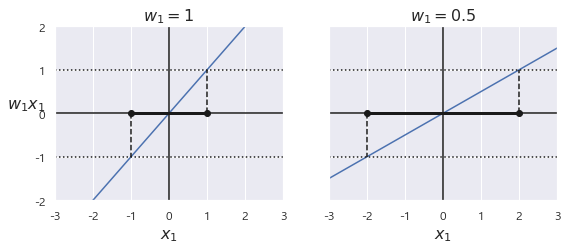

In [29]:
#가중치 벡터 w가 작을수록 마진은 커진다.
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

## 5.4.3 콰드라틱 프로그래밍

* 콰드라틱 프로그래밍(Quadratic Programming) : QP 문제
 - 하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제 

## 5.4.4 쌍대 문제

* 원 문제(Primal Problem)라는 제약이 있는 최적화 문제가 주어지면 쌍대 문제(Dual Problem)라고 하는 깊게 관련된 다른 문제로 표현할 수 있다.
* 쌍대 문제 해는 원 문제 해의 하한값이지만, 어떤 조건하에서는 원 문제와 똑같은 해를 제공한다.

## 5.4.5 커널 SVM

* 선형으로 분리되지 않는 데이터를 비선형 매핑, 즉 커널 함수를 이용해 저차원($\text{L}$)에서 고차원($\text{H}$)으로의 매핑(mapping)을 통해 해결할 수 있다. 이러한 커널함수를 이용하는 SVM을 Kernel SVM이라 한다.
* 커널의 종류
 - 선형(linear) : $K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^{T} \cdot \mathbf{b}$
 - 다항식(poly) : $K(\mathbf{a}, \mathbf{b}) = \left( \gamma \mathbf{a}^{T} \cdot  \mathbf{b} + r \right)^{d}$
 - 가우시안 RBF(rbf) : $K(\mathbf{a}, \mathbf{b}) = \text{exp} \left( -\gamma \| \mathbf{a} - \mathbf{b} \|^{2} \right)$
 - 시그모이드(sigmoid) : $K(\mathbf{a}, \mathbf{b}) = \tanh {\left( \gamma \mathbf{a}^{T} \cdot  \mathbf{b} + r \right)}$
*  2차 다항식 매핑

$
\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$

* 2차 다항식 매핑을 위한 커널 트릭

$
\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) &amp; \quad = \begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} = {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
 &amp; \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 = (\mathbf{a}^T \mathbf{b})^2
\end{split}
$

## 5.4.6 온라인 SVM

* 온라인 학습은 새로운 샘플이 생겼을 때 점진적으로 학습하는 것을 말한다.
* 선형 SVM 분류기의 비용 함수

$ J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum\limits_{i=1}^{m}max\left(0, t^{(i)} - (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)} $

* 힌지 손실
 - max(0, 1-t)함수
 - t ≥ 1 일 때 0
 - 함수의 도함수는 t <1 이면 -1이고, t > 1이면 0이다.
 - t = 1에서 미분 가능하지 않지만, 라쏘회귀처럼 t=1에서 서브그레디언트를 사용해 경사 하강법을 사용할 수 있다.

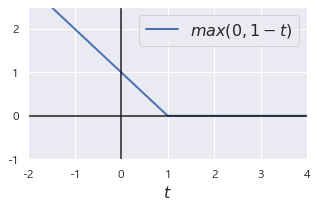

In [30]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()